In [40]:
import os
import glob as gb
import matplotlib.pyplot as plt
import pandas as pd

import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from keras.applications import InceptionResNetV2

In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"upadhyayroshan","key":"0549699db6f2d465b7b5794ac37a2262"}'}

In [4]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [02:08<00:00, 19.3MB/s]
100% 2.29G/2.29G [02:08<00:00, 19.2MB/s]


In [6]:
from zipfile import ZipFile
file_name = 'chest-xray-pneumonia.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [7]:
os.listdir('/content/chest_xray')

['train', 'test', 'chest_xray', '__MACOSX', 'val']

In [8]:
train= '/content/chest_xray/train'
val = '/content/chest_xray/val'
test = '/content/chest_xray/test'

In [26]:
for folder in os.listdir(train):
  files = gb.glob(pathname = str(train + '/' + folder + '/*.jpeg'))
  print(f'For data, found {len(files)} in folder {folder}')

For data, found 3875 in folder PNEUMONIA
For data, found 1341 in folder NORMAL


In [10]:
size = []
for folder in  os.listdir(train) : 
    files = gb.glob(pathname= str( train + '/' + folder + '/*.jpeg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0        (1075, 1334)
1       (188, 499, 3)
2          (568, 968)
3       (519, 790, 3)
4        (1152, 1720)
            ...      
5211     (1021, 1164)
5212     (1422, 1724)
5213     (1152, 1542)
5214     (1125, 1434)
5215     (1705, 1822)
Length: 5216, dtype: object>

In [11]:
code = {'NORMAL':0, 'PNEUMONIA':1}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [12]:
s = 100
X_Images = []
y_Types = []
for folder in  os.listdir(train) : 
    files = gb.glob(pathname= str( train + '/' + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_Images.append(list(image_array))
        y_Types.append(code[folder])

In [13]:
print(f'we have {len(X_Images)} items in X_Images')
print(f'we have {len(y_Types)} items in Y_Types')

we have 5216 items in X_Images
we have 5216 items in Y_Types


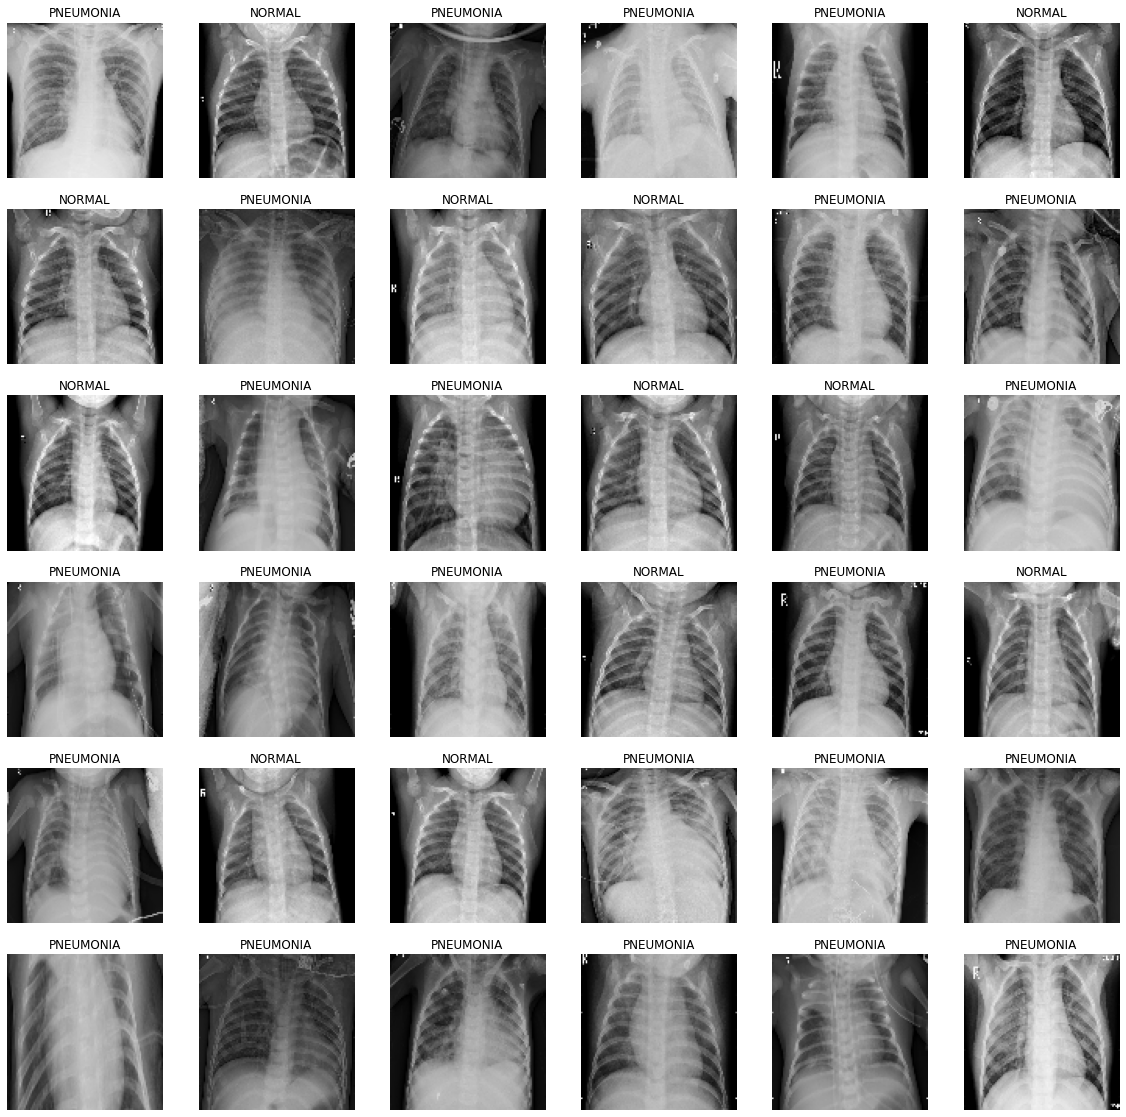

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_Images),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_Images[i])   
    plt.axis('off')
    plt.title(getcode(y_Types[i]))

In [15]:
# Define VGG16 Model
model = Sequential()
model.add(InceptionResNetV2(include_top=False,weights='imagenet',input_shape=(100,100,3)))

model.add(Flatten())

model.add(Dense(units=1024, activation='relu'))

model.add(Dense(units=512, activation='relu'))

model.add(Dense(units=5, activation='softmax'))

219055592/219055592 [==============================] - 10s 0us/step


In [16]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1, 1, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 1024)              1573888   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 56,437,989
Trainable params: 56,377,445
Non-trainable params: 60,544
_______________________________________

In [18]:
model.fit(np.array(X_Images), np.array(y_Types), epochs=10,batch_size=128,verbose=1)

Epoch 1/10
41/41 [==============================] - 49s 403ms/step - loss: 0.3100 - accuracy: 0.9047
Epoch 2/10
41/41 [==============================] - 14s 352ms/step - loss: 0.0534 - accuracy: 0.9810
Epoch 3/10
41/41 [==============================] - 16s 380ms/step - loss: 0.0168 - accuracy: 0.9948
Epoch 4/10
41/41 [==============================] - 15s 370ms/step - loss: 0.0197 - accuracy: 0.9942
Epoch 5/10
41/41 [==============================] - 15s 366ms/step - loss: 0.0133 - accuracy: 0.9950
Epoch 6/10
41/41 [==============================] - 15s 363ms/step - loss: 0.0084 - accuracy: 0.9962
Epoch 7/10
41/41 [==============================] - 15s 362ms/step - loss: 0.0039 - accuracy: 0.9983
Epoch 8/10
41/41 [==============================] - 15s 358ms/step - loss: 0.0108 - accuracy: 0.9956
Epoch 9/10
41/41 [==============================] - 15s 354ms/step - loss: 0.0050 - accuracy: 0.9985
Epoch 10/10
41/41 [==============================] - 15s 353ms/step - loss: 0.0063 - accura

In [19]:
Loss, Accuracy = model.evaluate(np.array(X_Images), np.array(y_Types),batch_size=128)

41/41 [==============================] - 10s 128ms/step - loss: 0.0124 - accuracy: 0.9960


In [20]:
print('Test Loss is {} %'.format(Loss*100))
print('Test Accuracy is {} %'.format(Accuracy*100 ))

Test Loss is 1.2354141101241112 %
Test Accuracy is 99.59739446640015 %


53/53 [==============================] - 12s 95ms/step


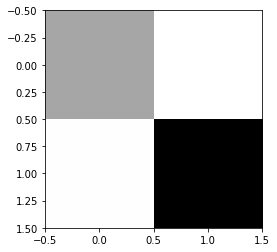

In [21]:
from sklearn.metrics import plot_confusion_matrix
pred = np.argmax(model.predict(np.array(X_Images),100),axis=1)
pred
cm = confusion_matrix(y_Types,pred)
cm
plt.imshow(cm, cmap='binary')

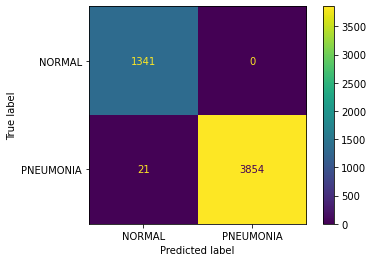

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['NORMAL','PNEUMONIA'])


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot()

plt.show()

# Training on Test data

In [25]:
for folder in os.listdir(test):
  files = gb.glob(pathname = str(test + '/' + folder + '/*.jpeg'))
  print(f'For data, found {len(files)} in folder {folder}')

For data, found 390 in folder PNEUMONIA
For data, found 234 in folder NORMAL


In [27]:
size = []
for folder in  os.listdir(test) : 
    files = gb.glob(pathname= str( test + '/' + folder + '/*.jpeg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0       (808, 1120)
1       (624, 1080)
2       (936, 1350)
3        (696, 992)
4        (464, 864)
           ...     
619    (1016, 1432)
620     (832, 1264)
621     (906, 1460)
622     (617, 1300)
623    (1110, 1802)
Length: 624, dtype: object>

In [28]:
code = {'NORMAL':0, 'PNEUMONIA':1}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [29]:
s = 100
X = []
Y = []
for folder in  os.listdir(test) : 
    files = gb.glob(pathname= str( test + '/' + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X.append(list(image_array))
        Y.append(code[folder])

In [33]:
print(f'we have {len(X)} items in X')
print(f'we have {len(Y)} items in Y')

we have 624 items in X
we have 624 items in Y


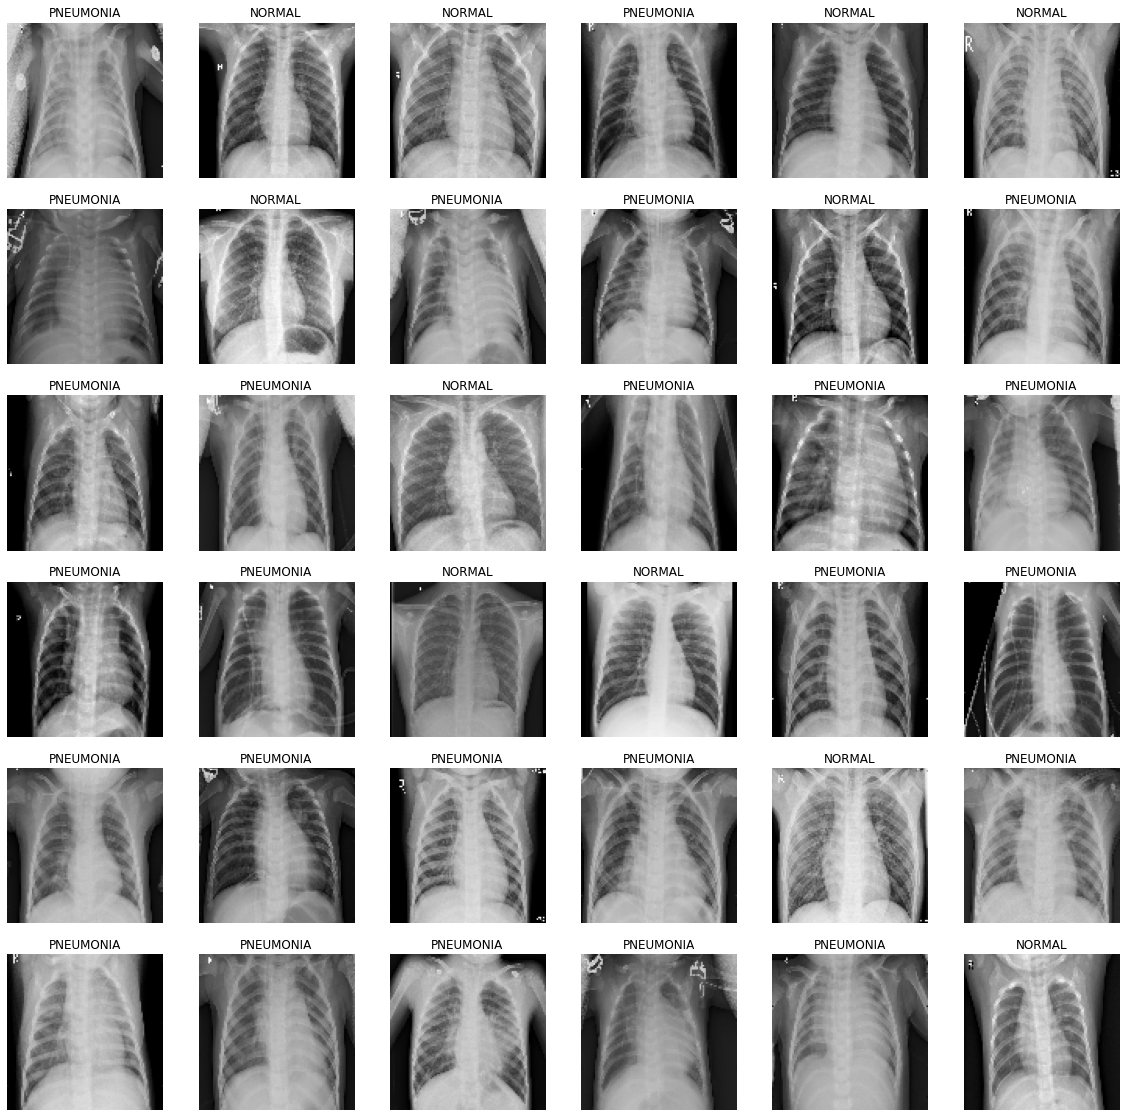

In [34]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X[i])   
    plt.axis('off')
    plt.title(getcode(Y[i]))

In [35]:
model.fit(np.array(X), np.array(Y), epochs=10,batch_size=64,verbose=1)

Epoch 1/10
10/10 [==============================] - 6s 429ms/step - loss: 0.5704 - accuracy: 0.8830
Epoch 2/10
10/10 [==============================] - 2s 206ms/step - loss: 0.1489 - accuracy: 0.9535
Epoch 3/10
10/10 [==============================] - 2s 206ms/step - loss: 0.1079 - accuracy: 0.9696
Epoch 4/10
10/10 [==============================] - 2s 206ms/step - loss: 0.0546 - accuracy: 0.9840
Epoch 5/10
10/10 [==============================] - 2s 207ms/step - loss: 0.0392 - accuracy: 0.9872
Epoch 6/10
10/10 [==============================] - 2s 207ms/step - loss: 0.0314 - accuracy: 0.9856
Epoch 7/10
10/10 [==============================] - 2s 206ms/step - loss: 0.0148 - accuracy: 0.9936
Epoch 8/10
10/10 [==============================] - 2s 207ms/step - loss: 0.0092 - accuracy: 0.9968
Epoch 9/10
10/10 [==============================] - 2s 207ms/step - loss: 0.0030 - accuracy: 0.9984
Epoch 10/10
10/10 [==============================] - 2s 209ms/step - loss: 0.0147 - accuracy: 0.9968

In [36]:
Loss, Accuracy = model.evaluate(np.array(X), np.array(Y),batch_size=64)

10/10 [==============================] - 1s 70ms/step - loss: 10.4573 - accuracy: 0.9904


In [37]:
print('Test Loss is {} %'.format(Loss*100))
print('Test Accuracy is {} %'.format(Accuracy*100 ))

Test Loss is 1045.728588104248 %
Test Accuracy is 99.03846383094788 %


7/7 [==============================] - 1s 182ms/step


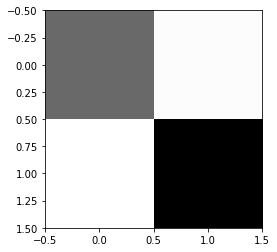

In [38]:
from sklearn.metrics import plot_confusion_matrix
pred = np.argmax(model.predict(np.array(X),100),axis=1)
pred
cm = confusion_matrix(Y,pred)
cm
plt.imshow(cm, cmap='binary')

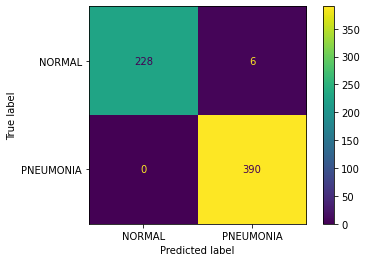

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NORMAL','PNEUMONIA'])


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot()

plt.show()

In [52]:
print(classification_report(np.array(Y), pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       234
           1       0.98      1.00      0.99       390

    accuracy                           0.99       624
   macro avg       0.99      0.99      0.99       624
weighted avg       0.99      0.99      0.99       624



# Validation of the Model

In [65]:
for folder in os.listdir(val):
  files = gb.glob(pathname = str(val + '/' + folder + '/*.jpeg'))
  print(f'For data, found {len(files)} in folder {folder}')

For data, found 8 in folder PNEUMONIA
For data, found 8 in folder NORMAL


In [66]:
size = []
for folder in  os.listdir(val) : 
    files = gb.glob(pathname= str( val + '/' + folder + '/*.jpeg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0       (592, 968)
1      (952, 1192)
2      (656, 1016)
3      (864, 1256)
4      (712, 1072)
5      (664, 1152)
6      (944, 1416)
7     (1128, 1664)
8     (1416, 1776)
9     (1225, 1632)
10    (1104, 1328)
11    (1302, 1564)
12    (1416, 1736)
13    (1104, 1240)
14    (1040, 1272)
15     (928, 1288)
dtype: object>

In [67]:
code = {'NORMAL':0, 'PNEUMONIA':1}
def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [68]:
s = 100
X = []
Y = []
for folder in  os.listdir(val) : 
    files = gb.glob(pathname= str( val + '/' + folder + '/*.jpeg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X.append(list(image_array))
        Y.append(code[folder])

In [69]:
print(f'we have {len(X)} items in X')
print(f'we have {len(Y)} items in Y')

we have 16 items in X
we have 16 items in Y


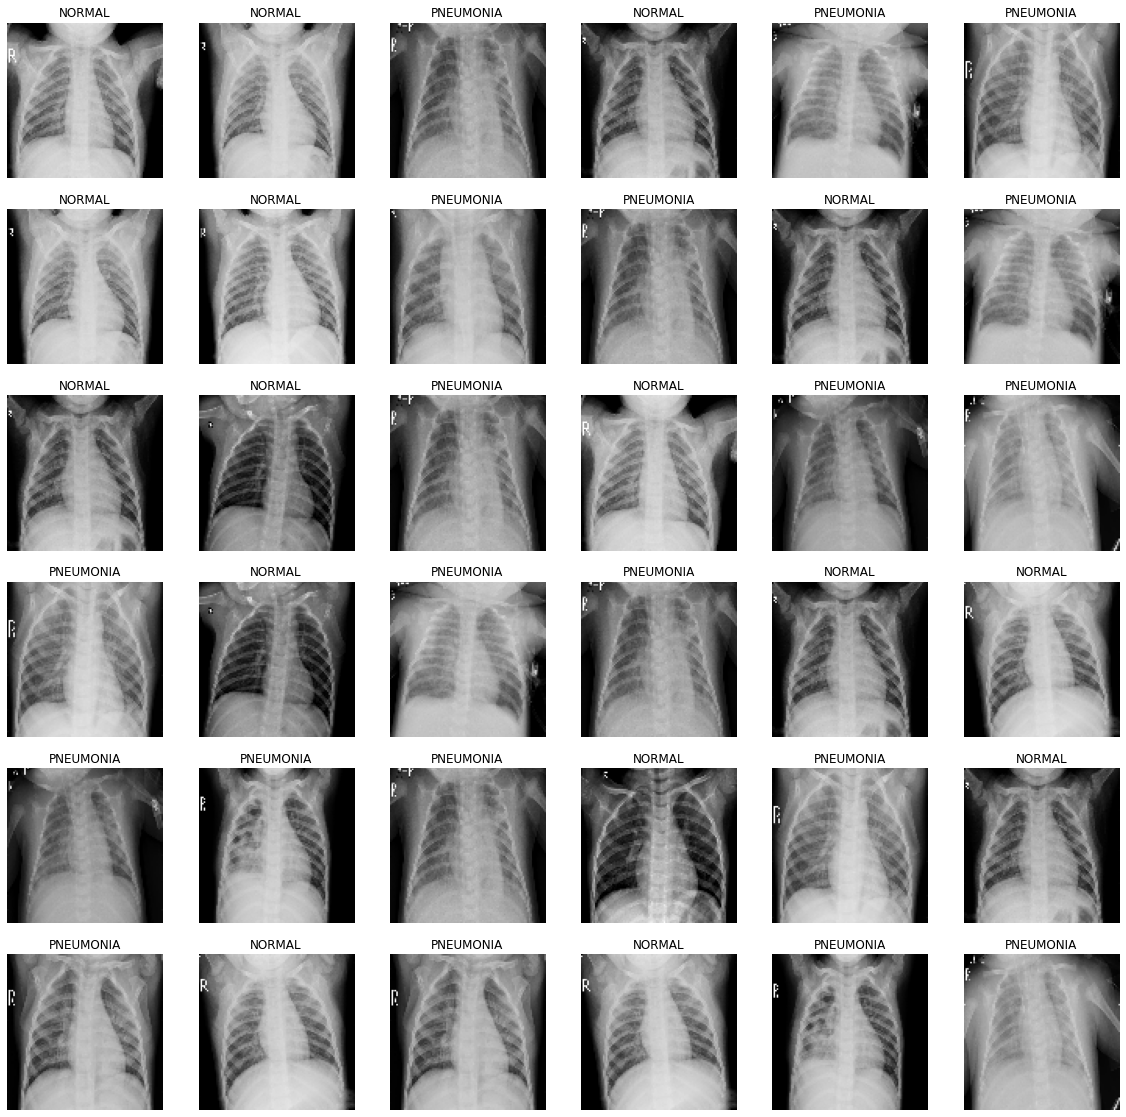

In [70]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X[i])   
    plt.axis('off')
    plt.title(getcode(Y[i]))

In [61]:
model.save('/content/drive/My Drive/Deep Learning Project/Pneumonia.h5')

In [62]:
model.save('/content/Pneumonia.h5')

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#load the trained model to classify sign
from keras.models import load_model
model = load_model('Pneumonia.h5')
#dictionary to label all classes.
classes = {0: 'Normal', 
           1: 'Pneumonia'
           }
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('X-Ray classification')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign)
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
  
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="check Pneumonia",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 3s 3s/step


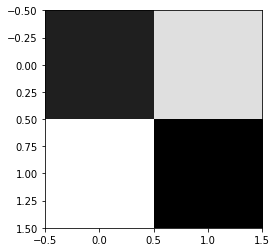

In [71]:
from sklearn.metrics import plot_confusion_matrix
pred = np.argmax(model.predict(np.array(X),100),axis=1)
pred
cm = confusion_matrix(Y,pred)
cm
plt.imshow(cm, cmap='binary')

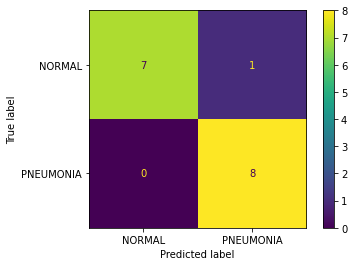

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['NORMAL','PNEUMONIA'])


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
disp = disp.plot()

plt.show()

In [73]:
print(classification_report(np.array(Y), pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16

